In [613]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy.signal as sp
import scipy

Load Img > Sometimes Blur > HSV > Mask > Threshold > Grayscale > Edges > Circles/Lines > Shape > Centroid. ITS SO SIMPLE.

Am I thinking about this pipeline correctly
Img > Denoise > Mask(HSV/BGR?) > TemplateMatch > Cluster



# Load Image

(200, 500, 3)


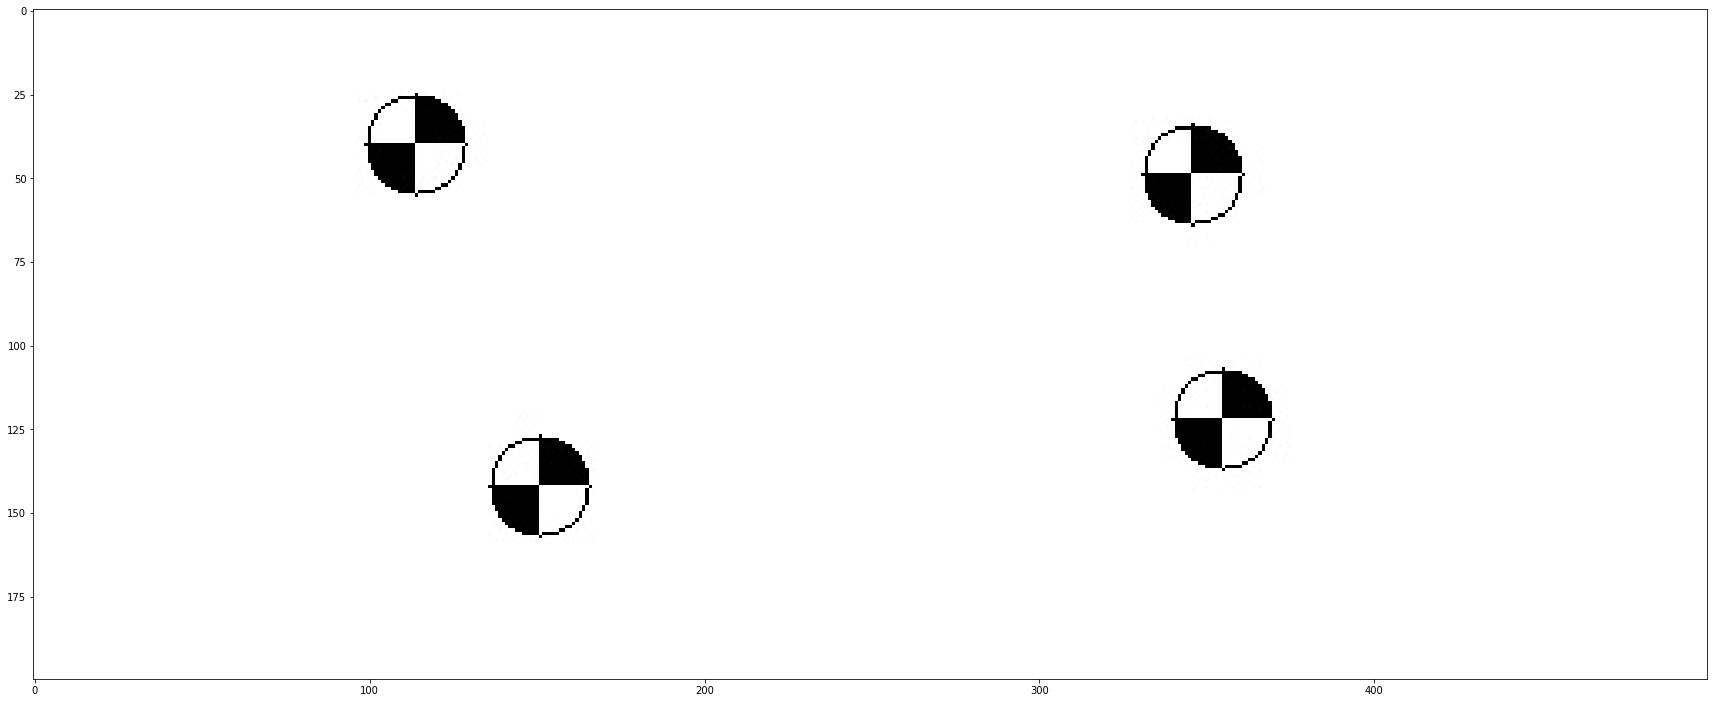

(33, 33)


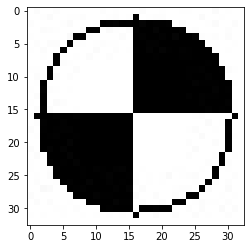

In [614]:
img = cv2.imread('sim_clear_scene.jpg')
# img = cv2.imread('sim_noisy_scene_2.jpg')
# img = cv2.imread('ps3-2-a_base.jpg')
# img = cv2.imread('ps3-2-b_base.jpg')
# img = cv2.imread('ps3-2-c_base.jpg')
# img = cv2.imread('ps3-2-d_base.jpg')
# img = cv2.imread('ps3-2-e_base.jpg')
print(img.shape)
plt.figure(figsize = (30, 50))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

template = cv2.imread('template.jpg', 0)
print(template.shape)

plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
plt.show()

## Remove noise

<Figure size 2160x3600 with 0 Axes>

<Figure size 2160x3600 with 0 Axes>

<Figure size 2160x3600 with 0 Axes>

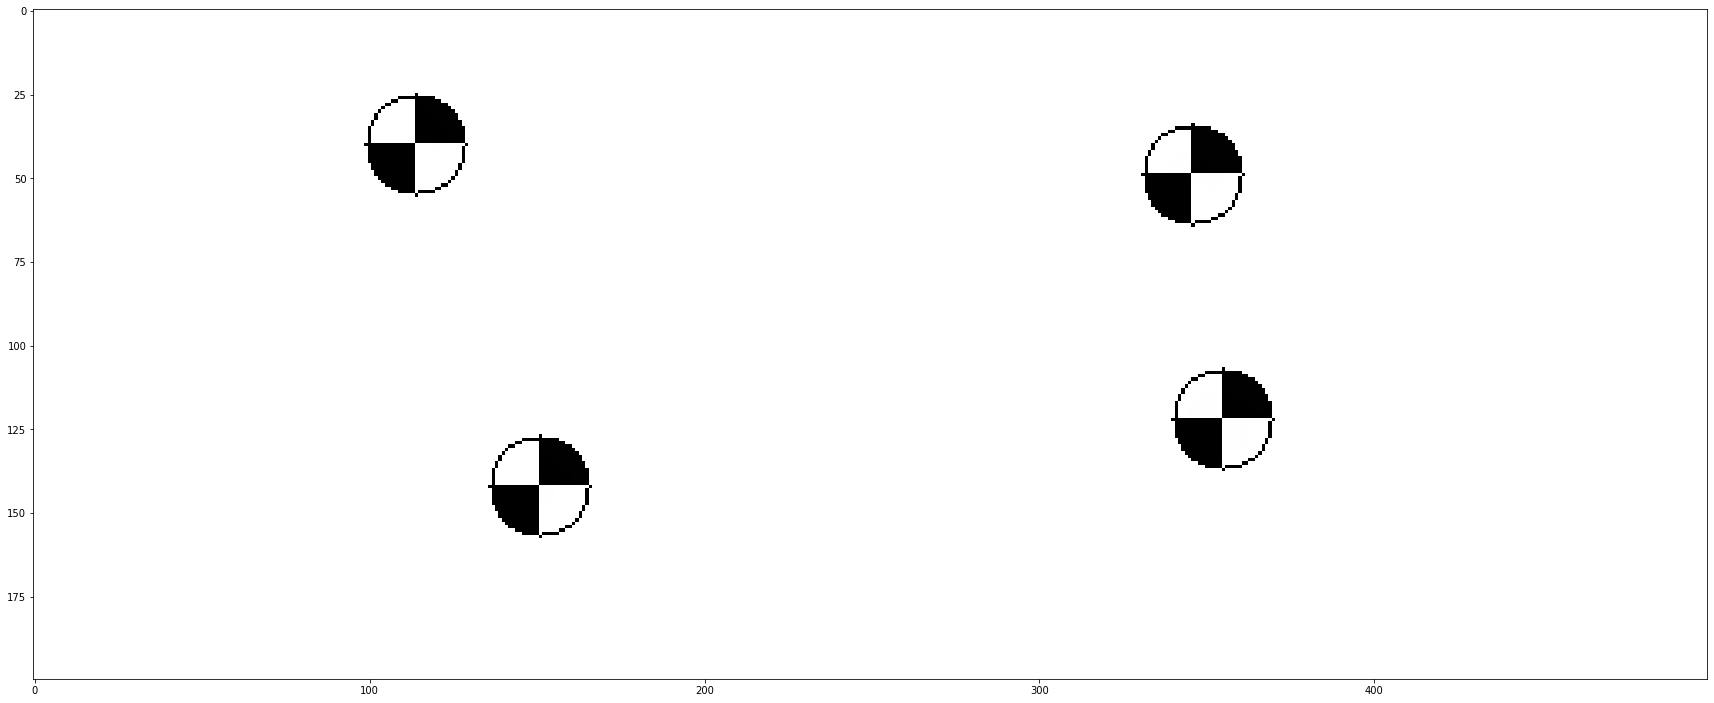

In [602]:
temp_img = np.copy(img)

# GaussianGlur
blur_sigma = 1
denoised_img_gauss = cv2.GaussianBlur(temp_img, (5, 5), blur_sigma)
plt.figure(figsize = (30, 50))
# plt.imshow(cv2.cvtColor(denoised_img_gauss, cv2.COLOR_BGR2RGB))
# plt.show()

# medianBlur
denoised_img_median = cv2.medianBlur(temp_img, 3)
plt.figure(figsize = (30, 50))
# plt.imshow(cv2.cvtColor(denoised_img_median, cv2.COLOR_BGR2RGB))
# plt.show()

# bilateralFilter
d, sigma_color, sigma_space = (30, 70, 70)
denoised_img_bifi = cv2.bilateralFilter(temp_img, d, sigma_color, sigma_space)
plt.figure(figsize = (30, 50))
# plt.imshow(cv2.cvtColor(denoised_img_bifi, cv2.COLOR_BGR2RGB))
# plt.show()

# >>>>>>>>> USING BILATERALFILTER <<<<<<<<<<
denoised_image = denoised_img_bifi
plt.figure(figsize = (30, 50))
plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
plt.show()

## Mask

In [615]:
# def color_filter_bgr(img_in, bgr, tolerance):
#     """
#     Inspired from https://www.learnopencv.com/color-spaces-in-opencv-cpp-python/
#     """
#     min_bgr = np.array([bgr[0] - tolerance, bgr[1] - tolerance, bgr[2] - tolerance])
#     max_bgr = np.array([bgr[0] + tolerance, bgr[1] + tolerance, bgr[2] + tolerance])

#     mask_bgr = cv2.inRange(img_in, min_bgr, max_bgr)
#     return mask_bgr
# #     plt.imshow(mask_bgr, 'gray')
# #     plt.show()
    
# #     img_binary = cv2.bitwise_and(img_in, img_in, mask=mask_bgr)
# #     plt.imshow(img_binary)
# #     plt.show()

# #     return img_binary

In [616]:
# bgr = [0, 0, 0]
# tolerance = 120
# img_binary = color_filter_bgr(denoised_image, bgr, tolerance)
# img_binary = cv2.bitwise_not(img_binary)

# plt.figure(figsize = (30, 50))
# plt.imshow(cv2.cvtColor(img_binary, cv2.COLOR_BGR2RGB))
# plt.show()

## Template rotation

In [585]:
template_rot = scipy.ndimage.rotate(template, 90)

In [626]:
template_img = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY)
results = cv2.matchTemplate(template_img, template, method=cv2.TM_CCORR_NORMED)

threshold = 0.83
# threshold = 0.99
results = np.where(results >= threshold)

th, tw = template.shape[:2]

markers = []

for upper_left_pt in zip(*results[::-1]):
    x = upper_left_pt[0] + int(tw / 2)
    y = upper_left_pt[1] + int(th / 2)
    markers.append((x, y))
    
print(markers)

[(114, 37), (112, 38), (113, 38), (114, 38), (115, 38), (112, 39), (113, 39), (114, 39), (115, 39), (116, 39), (111, 40), (112, 40), (113, 40), (114, 40), (115, 40), (116, 40), (117, 40), (112, 41), (113, 41), (114, 41), (115, 41), (116, 41), (113, 42), (114, 42), (115, 42), (116, 42), (114, 43), (346, 46), (344, 47), (345, 47), (346, 47), (347, 47), (344, 48), (345, 48), (346, 48), (347, 48), (348, 48), (343, 49), (344, 49), (345, 49), (346, 49), (347, 49), (348, 49), (349, 49), (344, 50), (345, 50), (346, 50), (347, 50), (348, 50), (345, 51), (346, 51), (347, 51), (348, 51), (346, 52), (355, 119), (353, 120), (354, 120), (355, 120), (356, 120), (353, 121), (354, 121), (355, 121), (356, 121), (357, 121), (352, 122), (353, 122), (354, 122), (355, 122), (356, 122), (357, 122), (358, 122), (353, 123), (354, 123), (355, 123), (356, 123), (357, 123), (354, 124), (355, 124), (356, 124), (357, 124), (355, 125), (151, 139), (149, 140), (150, 140), (151, 140), (152, 140), (149, 141), (150, 141

## Template finder

In [627]:
template_img = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY)
results = cv2.matchTemplate(template_img, template, method=cv2.TM_CCORR_NORMED)

# threshold = 0.83
threshold = 0.83
results = np.where(results >= threshold)

th, tw = template.shape[:2]

markers = []

for upper_left_pt in zip(*results[::-1]):
    x = upper_left_pt[0] + int(tw / 2)
    y = upper_left_pt[1] + int(th / 2)
    markers.append((x, y))

print(markers)

[(114, 37), (112, 38), (113, 38), (114, 38), (115, 38), (112, 39), (113, 39), (114, 39), (115, 39), (116, 39), (111, 40), (112, 40), (113, 40), (114, 40), (115, 40), (116, 40), (117, 40), (112, 41), (113, 41), (114, 41), (115, 41), (116, 41), (113, 42), (114, 42), (115, 42), (116, 42), (114, 43), (346, 46), (344, 47), (345, 47), (346, 47), (347, 47), (344, 48), (345, 48), (346, 48), (347, 48), (348, 48), (343, 49), (344, 49), (345, 49), (346, 49), (347, 49), (348, 49), (349, 49), (344, 50), (345, 50), (346, 50), (347, 50), (348, 50), (345, 51), (346, 51), (347, 51), (348, 51), (346, 52), (355, 119), (353, 120), (354, 120), (355, 120), (356, 120), (353, 121), (354, 121), (355, 121), (356, 121), (357, 121), (352, 122), (353, 122), (354, 122), (355, 122), (356, 122), (357, 122), (358, 122), (353, 123), (354, 123), (355, 123), (356, 123), (357, 123), (354, 124), (355, 124), (356, 124), (357, 124), (355, 125), (151, 139), (149, 140), (150, 140), (151, 140), (152, 140), (149, 141), (150, 141

In [629]:
# indexes = []
# markers = []
# for i in range(0, 90, 5):
#     tmp = template_match(i)
#     if tmp != []:
#         indexes.append(i)
#         markers = tmp
# print(markers)
# print(indexes)

## Draw

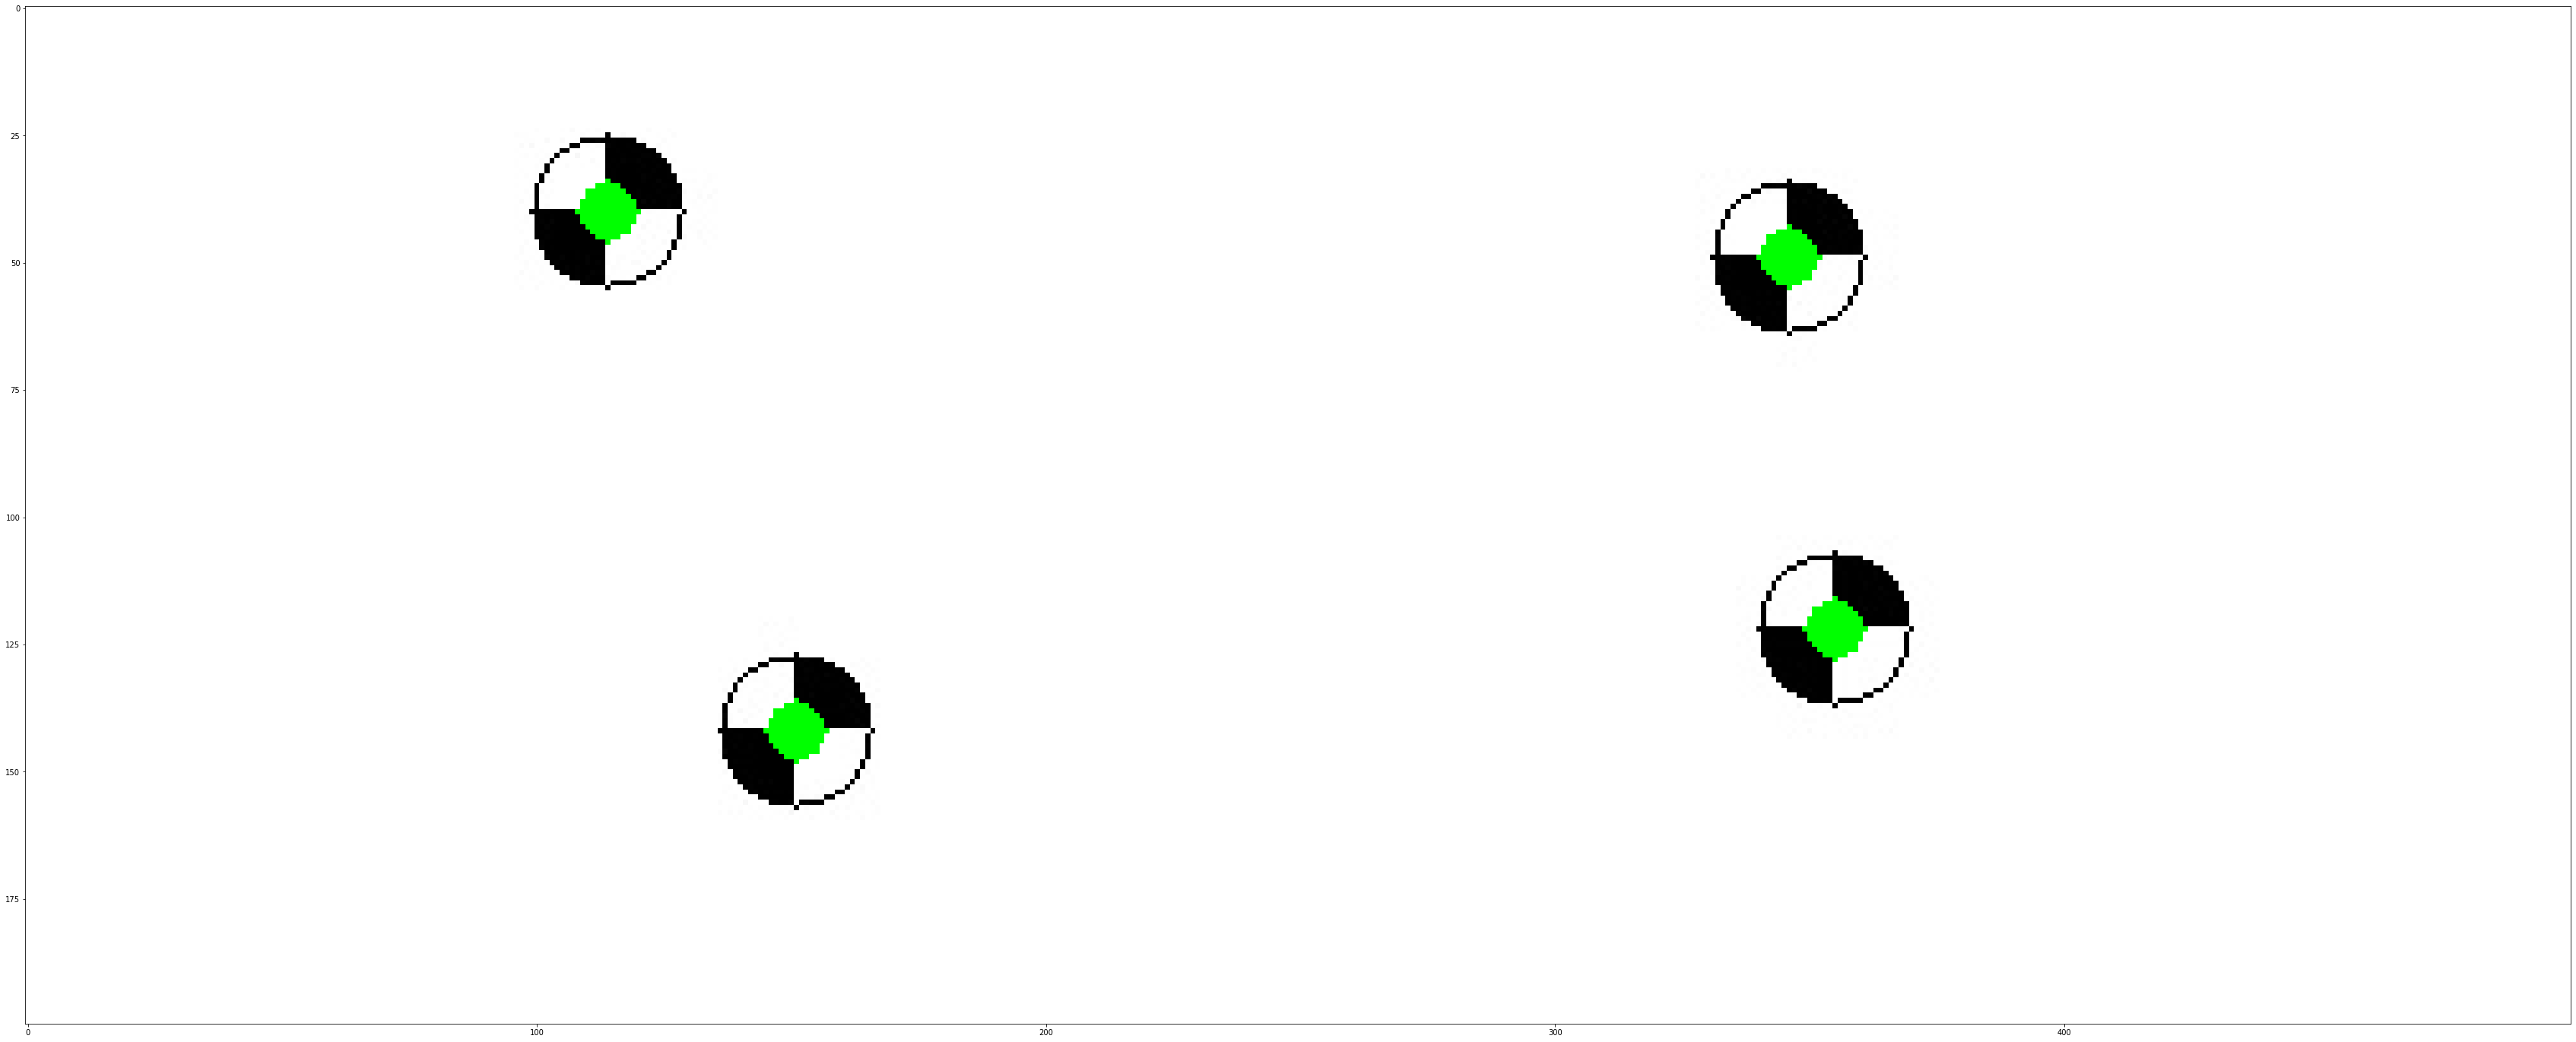

In [630]:
marked_img = np.copy(img)
for pt in markers:
#     print(pt)
#     cv2.rectangle(marked_img, pt, (pt[0] + tw, pt[1] + th), (0,0,255), 1)
    cv2.circle(marked_img, pt, 3, (0, 255, 0), -1)
    
plt.figure(figsize = (60, 100))
plt.imshow(cv2.cvtColor(marked_img, cv2.COLOR_BGR2RGB))
plt.show()

## Cluster

In [631]:
markers_float32 = np.array(markers, dtype='float32')
print(len(markers_float32))

# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Set flags (Just to avoid line break in the code)
flags = cv2.KMEANS_RANDOM_CENTERS

# Apply KMeans
compactness, labels, centers = cv2.kmeans(markers_float32, 4, None, criteria,10,flags)

markers_clustered = [tuple(x) for x in centers.astype(np.uint16).tolist()]

print(markers_clustered)

108
[(114, 40), (151, 142), (346, 49), (355, 122)]


# Draw clustered points

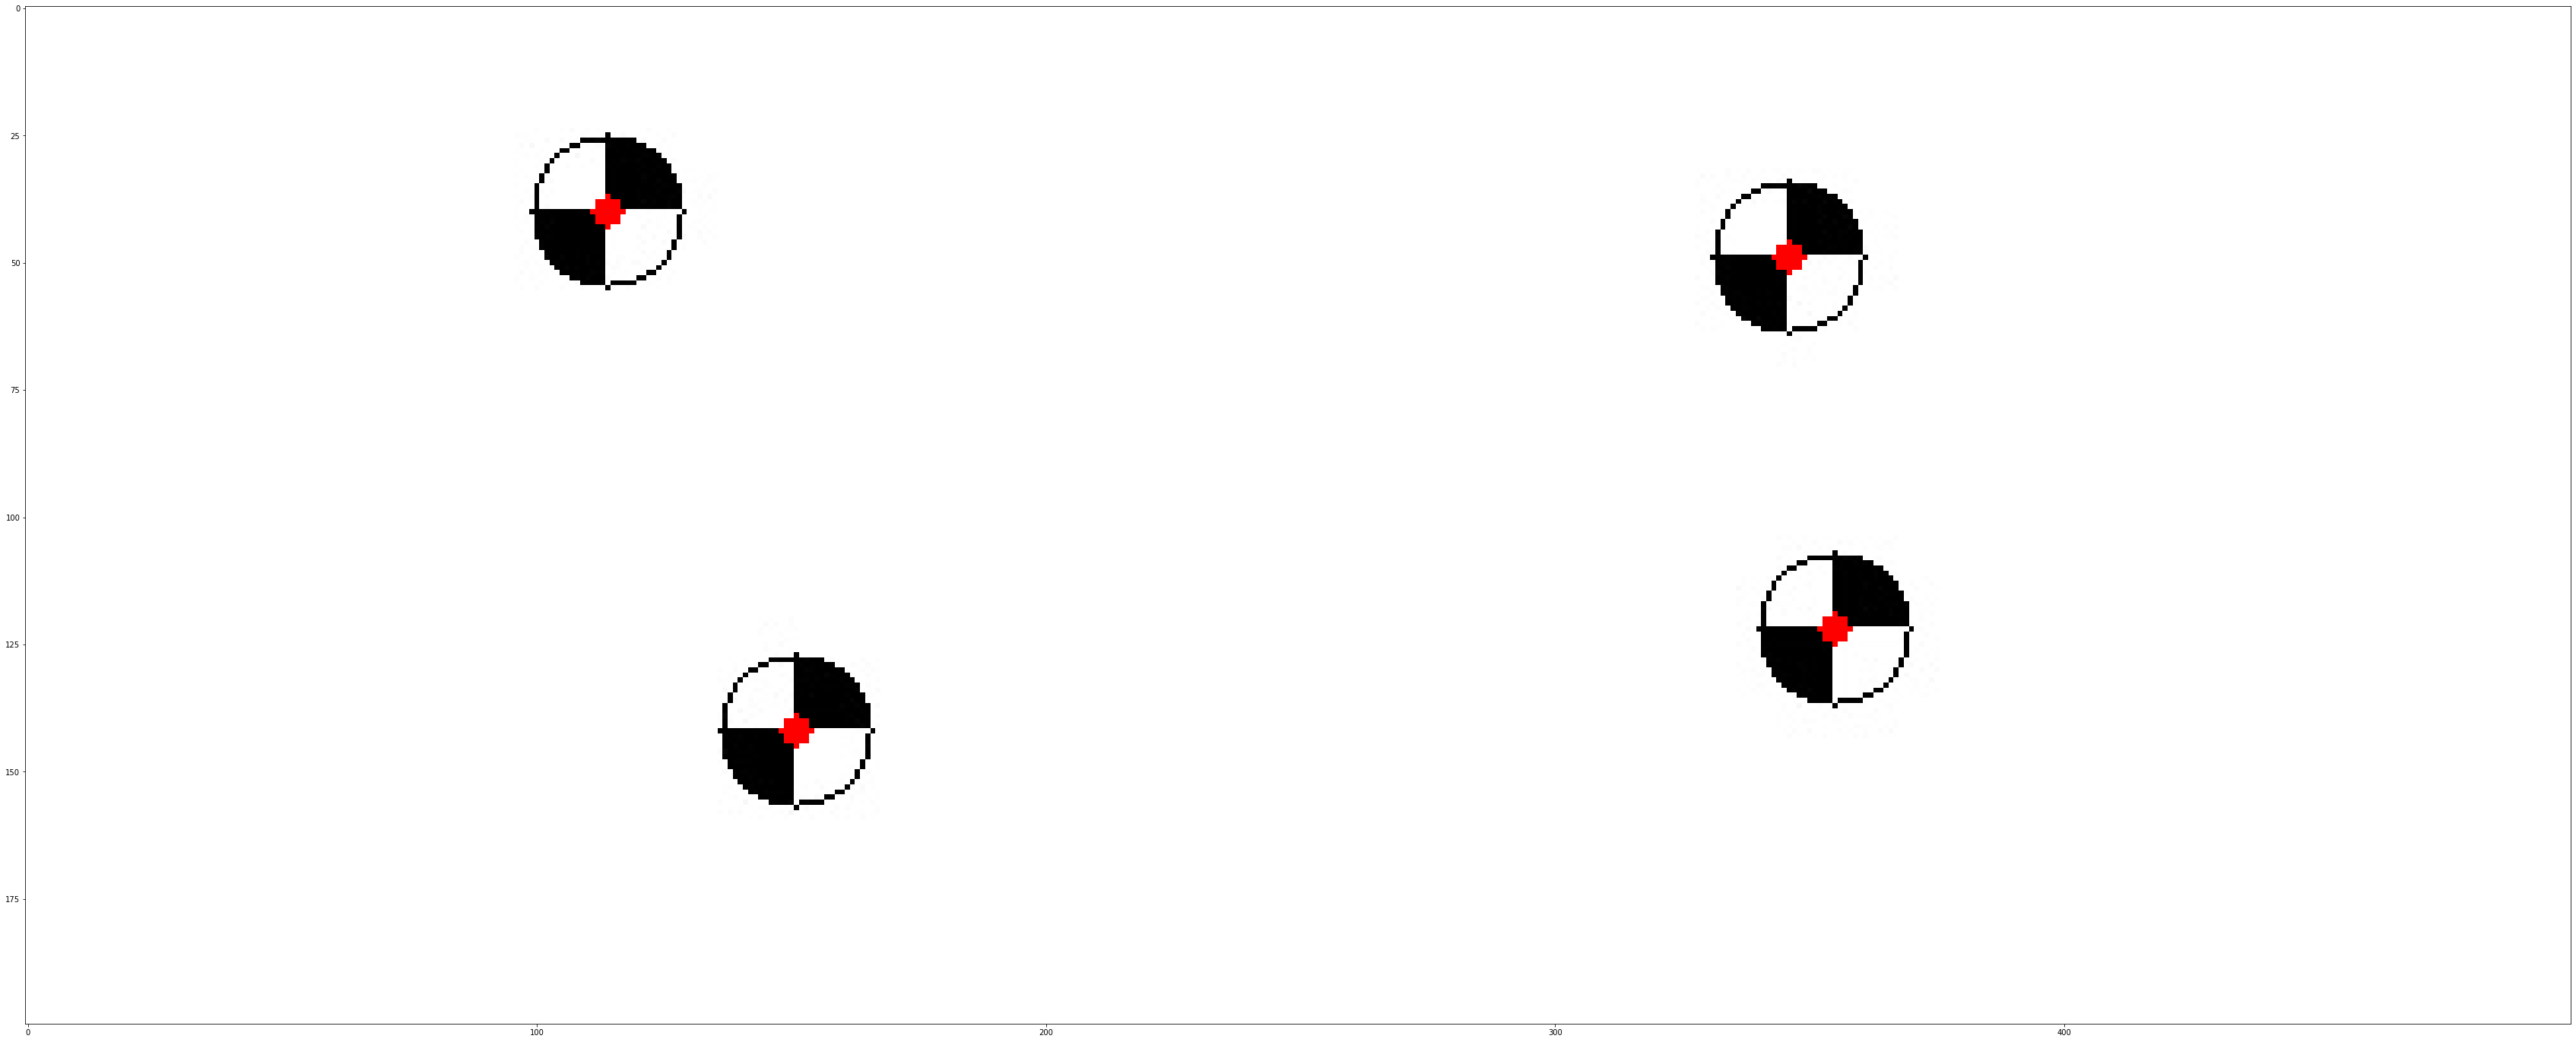

[(114, 40), (151, 142), (346, 49), (355, 122)]


In [632]:
marked_img = np.copy(img)
# for pt in zip(*loc[::-1]):
for pt in markers_clustered:
    cv2.circle(marked_img, pt, 3, (0, 0, 255), -1)
    
plt.figure(figsize = (60, 100))
plt.imshow(cv2.cvtColor(marked_img, cv2.COLOR_BGR2RGB))
plt.show()
print(markers_clustered)